# Go to the following notebook copy it on your drive and apply the necessary ML algorithm for a given dataset. Evaluate the model using one feature and multiple features. Use the feature selection technique to select one feature. https://colab.research.google.com/drive/1GwS2JdNH0Qplbg8P-e-L22Vnnx5x7hcM?usp=sharing
Regression problem: Single and Multiple
Y= sales
Predict sales: LinearRegression(), SVR() Build a streamlit application that can predict sales based on TV ads.

In [1]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /Users/sam/Desktop/datascienceproject/sales_prediction/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 9.53MB/s]


In [21]:
# Loading necessary libraries

import pandas as pd

# Loading dataset from local CSV file
df = pd.read_csv("ads.csv") 
print(df.head())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [24]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
df = 'ads.csv'
df = pd.read_csv(df, index_col=0)
print(df.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


# EDA

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


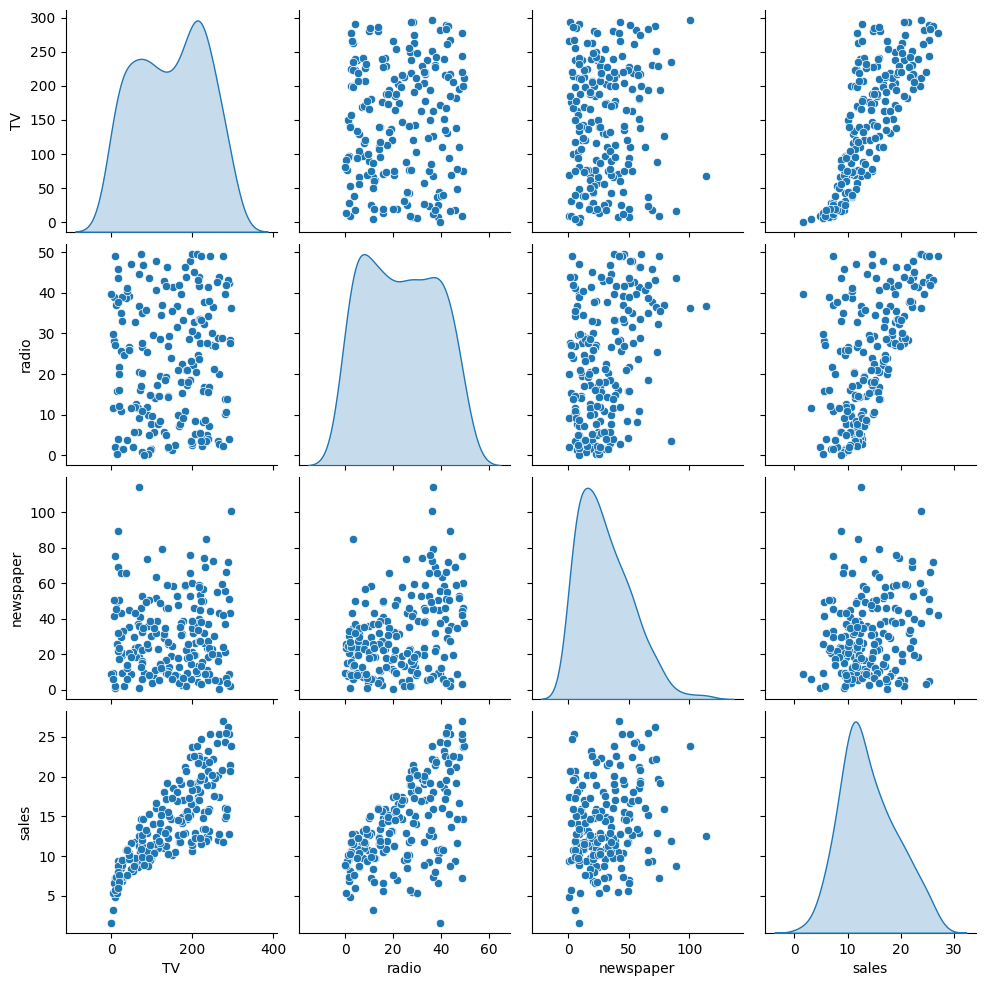

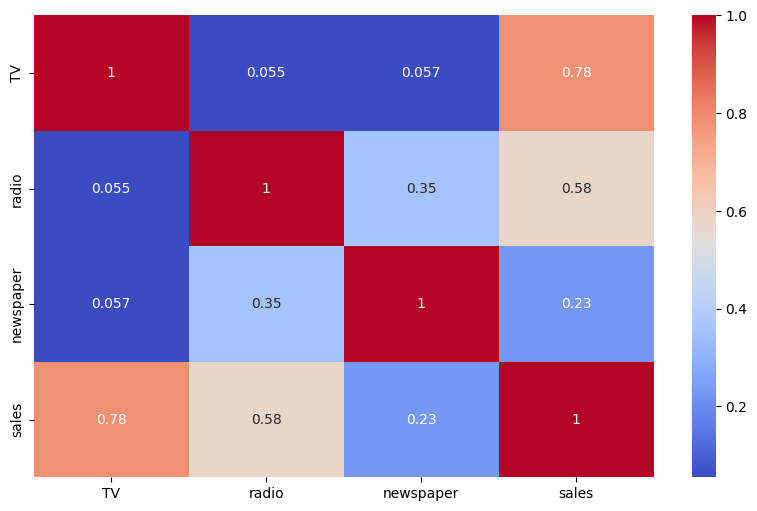

In [5]:
print(df.describe())
sns.pairplot(df, diag_kind='kde')
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Using Recursive Feature Elimination (RFE)

In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=1)
fit = rfe.fit(X, y)

print("Feature Ranking: ", fit.ranking_)
print("Selected Feature: ", X.columns[fit.support_])

Feature Ranking:  [2 1 3]
Selected Feature:  Index(['radio'], dtype='object')


# Single Feature Model

In [7]:
X_single = df[['TV']]
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

model_single_lr = LinearRegression()
model_single_lr.fit(X_train_single, y_train)
y_pred_single_lr = model_single_lr.predict(X_test_single)

model_single_svr = SVR()
model_single_svr.fit(X_train_single, y_train)
y_pred_single_svr = model_single_svr.predict(X_test_single)

print("Single Feature - Linear Regression")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_single_lr))
print("R2 Score: ", r2_score(y_test, y_pred_single_lr))

print("Single Feature - SVR")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_single_svr))
print("R2 Score: ", r2_score(y_test, y_pred_single_svr))

Single Feature - Linear Regression
Mean Squared Error:  10.204654118800956
R2 Score:  0.6766954295627076
Single Feature - SVR
Mean Squared Error:  11.114260909710861
R2 Score:  0.6478772031555862


In [2]:
app.py

NameError: name 'app' is not defined

# Build a Streamlit Application

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(df, index_col=0)

# Prepare the data
X = df[['TV']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Streamlit App
st.title("sales Prediction Based on TV Ads")

st.write("""
This application predicts sales based on the amount spent on TV advertising.
""")

# User input
tv_budget = st.number_input("Enter the TV advertising budget ($):", min_value=0, value=100)

# Prediction
if st.button("Predict sales"):
    sales_pred = model.predict([[tv_budget]])[0]
    st.write(f"Predicted sales: ${sales_pred:.2f}")

if st.checkbox("Show Raw Data"):
    st.write(df)

2025-04-30 17:57:57.346 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 17:57:57.387 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-30 17:57:57.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 17:57:57.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 17:57:57.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 17:57:57.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30 17:57:57.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-30